In [4]:
#import all libraries
import pandas as pd
import numpy as np 
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import tree
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn import datasets
from numpy import mean, cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

In [5]:
heartData = pd.read_csv('heart_failure_clinical_records.csv')

age = heartData['age']
anaemia = heartData['anaemia']
cpk = heartData['creatinine_phosphokinase']
diabetes = heartData['diabetes']
ef = heartData['ejection_fraction']
hbp = heartData['high_blood_pressure']
platelets = heartData['platelets']
cr = heartData['serum_creatinine']
sod = heartData['serum_sodium']
gender = heartData['sex']
smoke = heartData['smoking']
time = heartData['time']
death = heartData['DEATH_EVENT']
col_names = ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
     

In [6]:
#randomly split 80/20 the dataset into training & test components 
x = heartData.copy() #create x,y variables to copy  
y = x['DEATH_EVENT']
x = x.drop(['DEATH_EVENT'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=0, 
                                                    test_size=0.2, 
                                                    shuffle=True)
scaler_ss=preprocessing.StandardScaler()
X_train_norm=scaler_ss.fit_transform(x_train)
X_test_norm=scaler_ss.transform(x_test)

In [7]:
heartData.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,60.229868,0.474378,583.199610,0.448023,37.981942,0.370425,262892.483826,1.369434,136.897999,0.629575,0.299658,131.261103,0.305027
std,11.709011,0.499465,981.123601,0.497412,11.298211,0.483036,101455.989705,0.997879,4.468077,0.483036,0.458220,77.844488,0.460531
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,118.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,317000.000000,1.300000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [8]:
heartData.shape

(2049, 13)

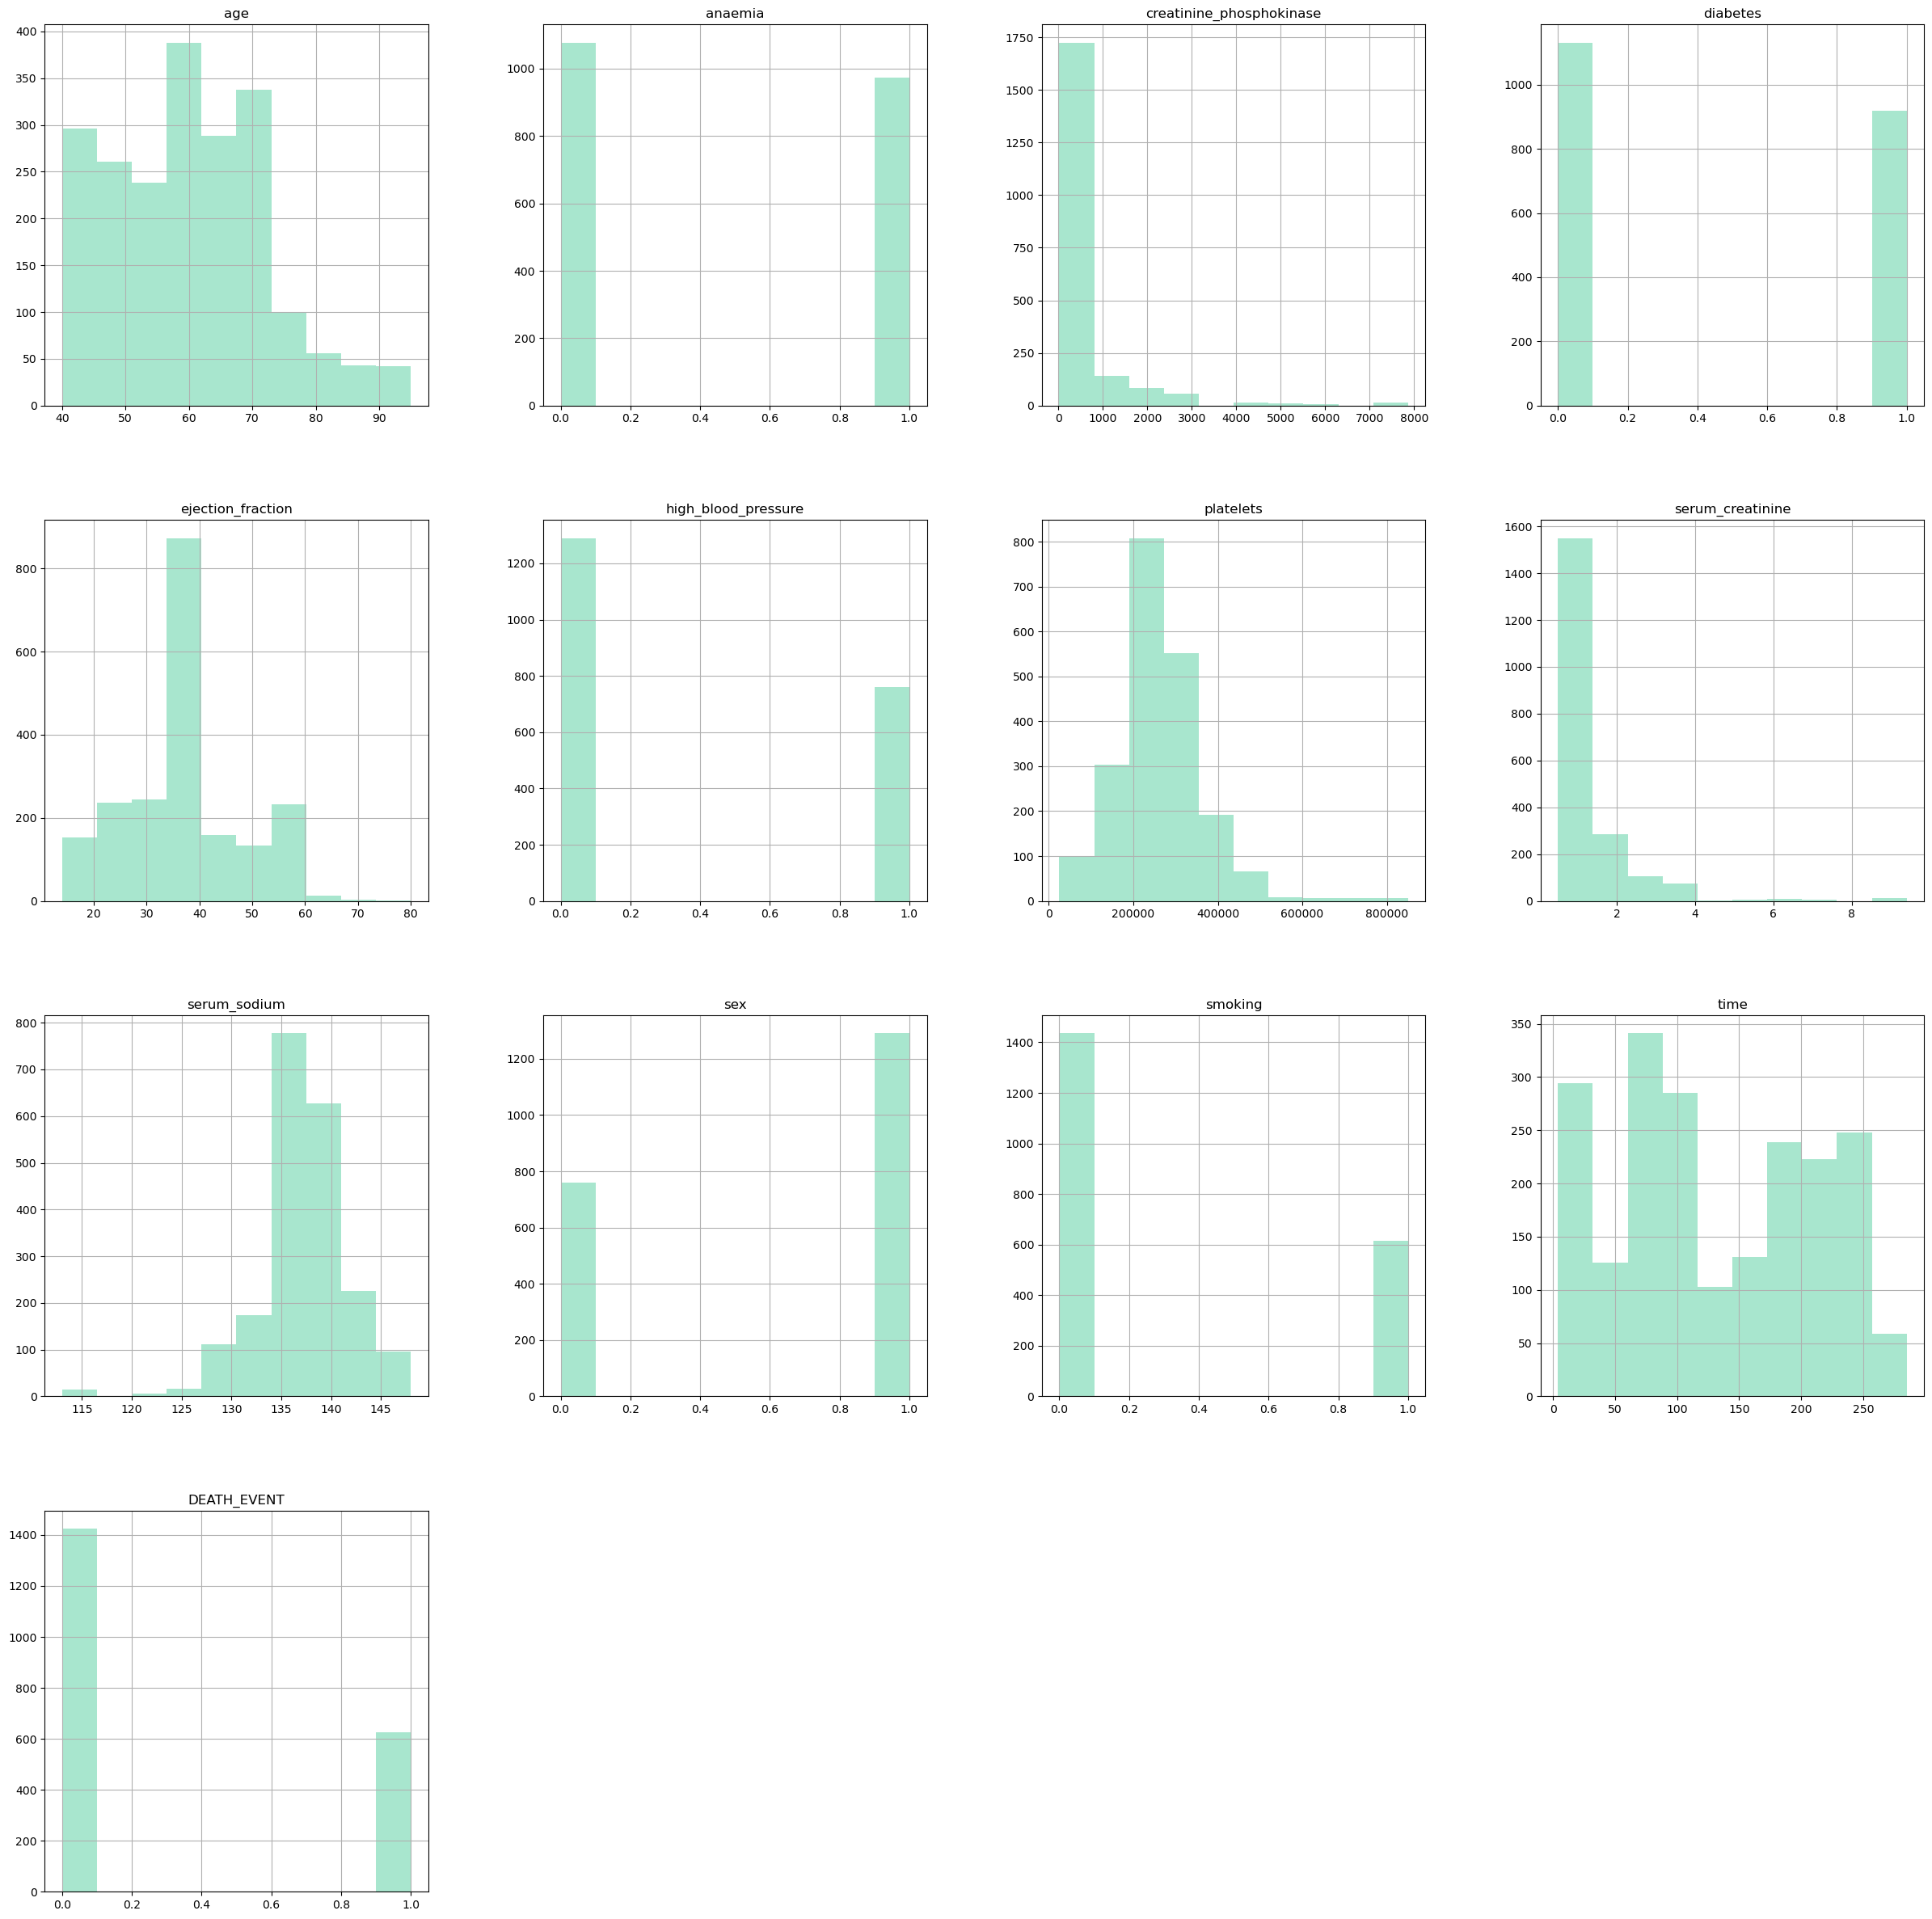

In [9]:
#create plots
heartData.hist(bins=10,figsize=(30,30),color = "#A8E6CE")
plt.show()

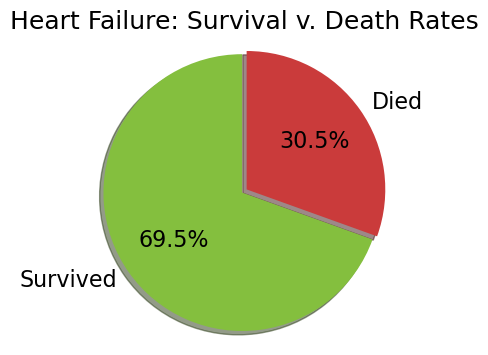

In [12]:
labels = 'Survived', 'Died'
sizes = [len(heartData[heartData['DEATH_EVENT']==0]),len(heartData[heartData['DEATH_EVENT']==1])]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=('#84BF3E','#CA3B3B'), startangle=90,textprops={'fontsize': 16})
ax1.set_title("Heart Failure: Survival v. Death Rates",fontdict={'fontsize': 18})
ax1.axis('equal') 

plt.show()

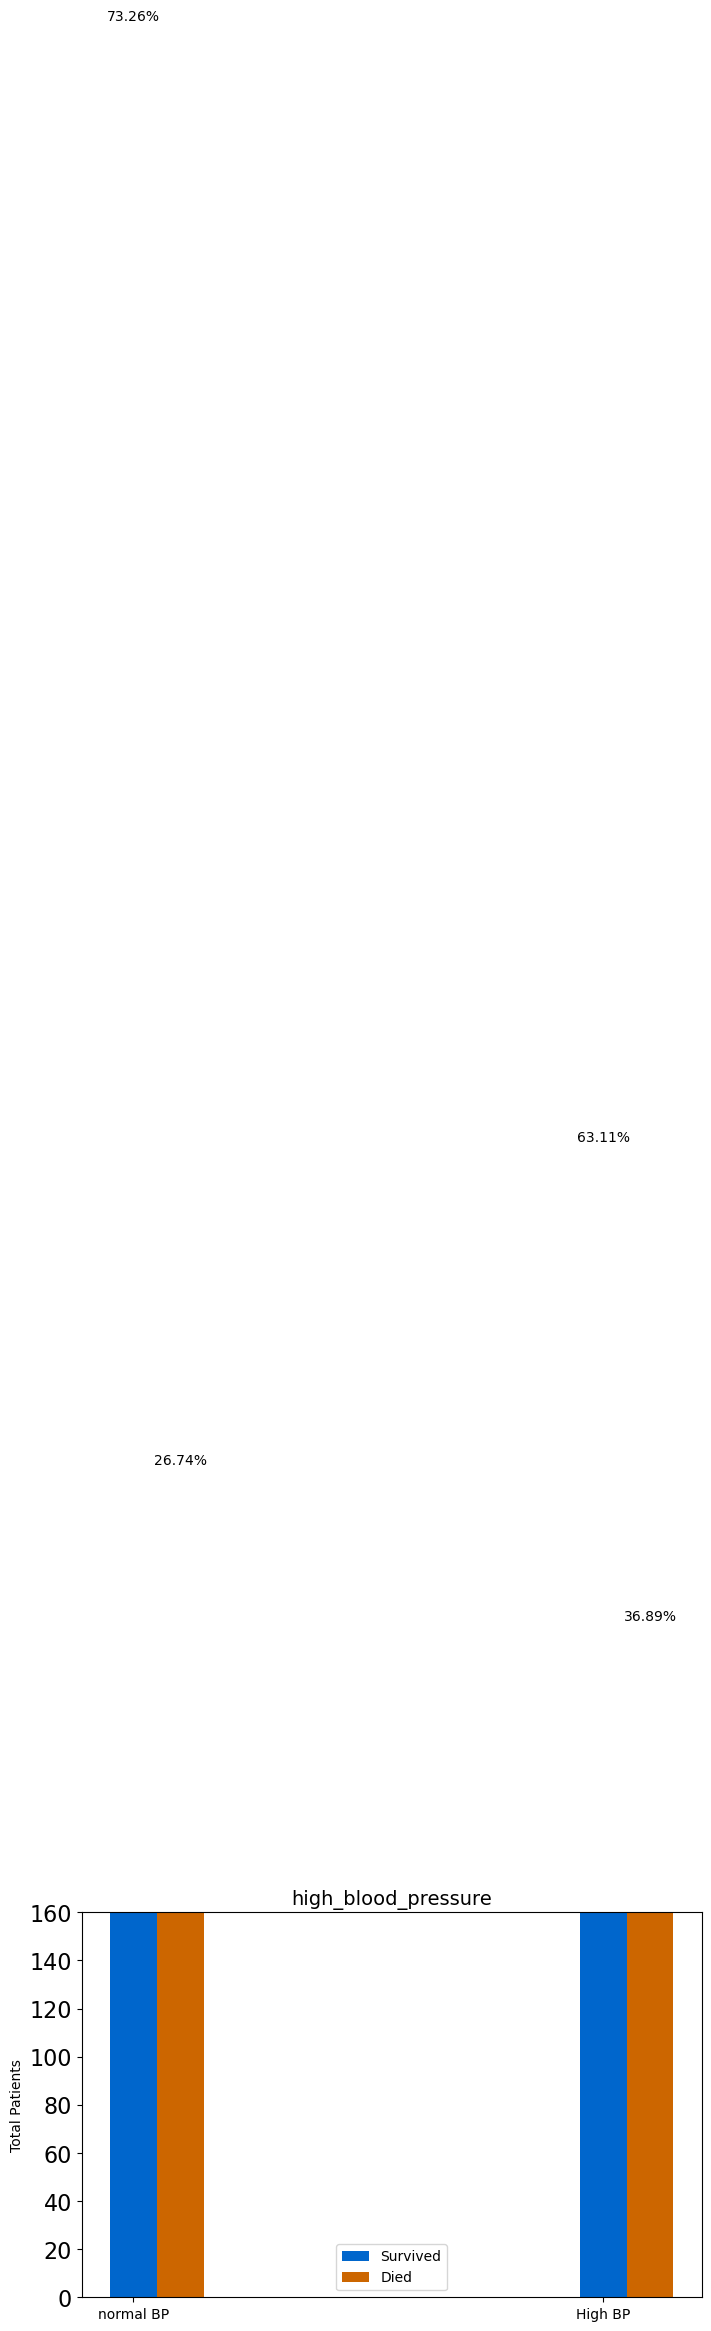

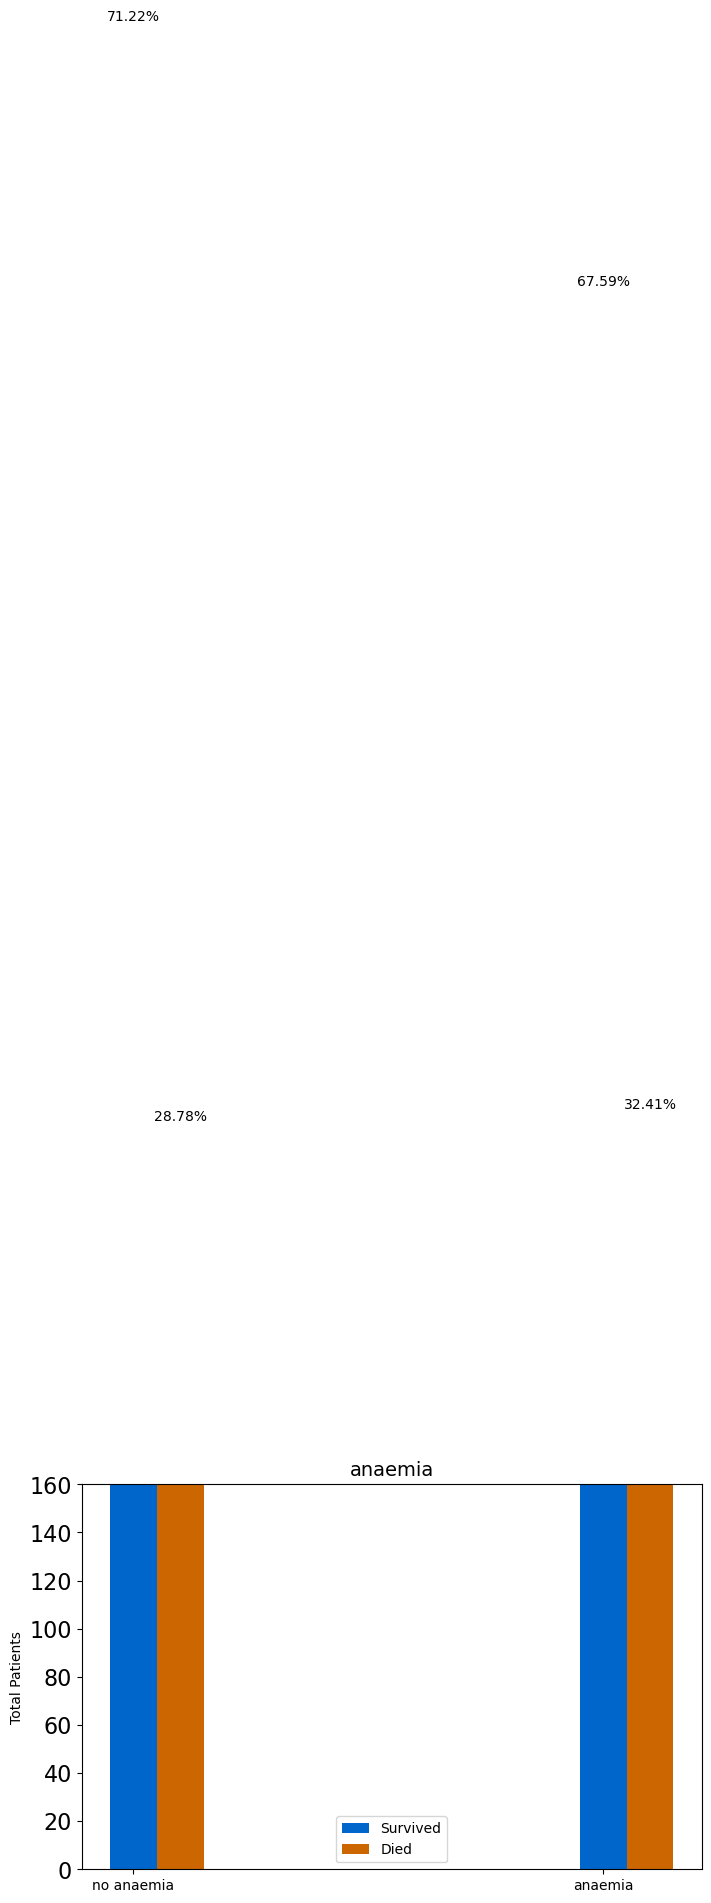

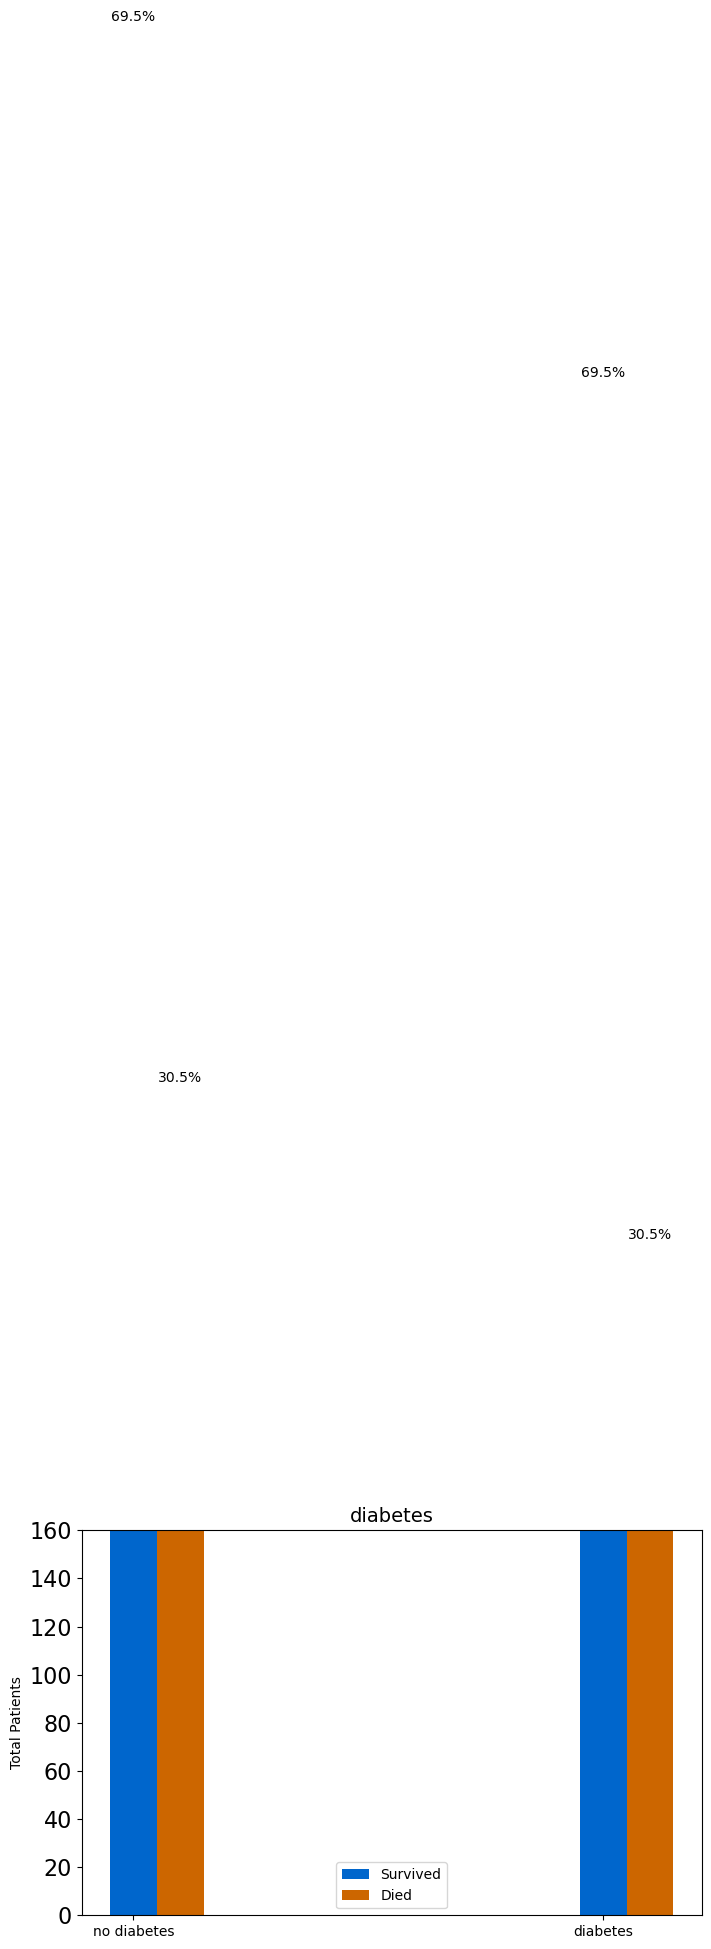

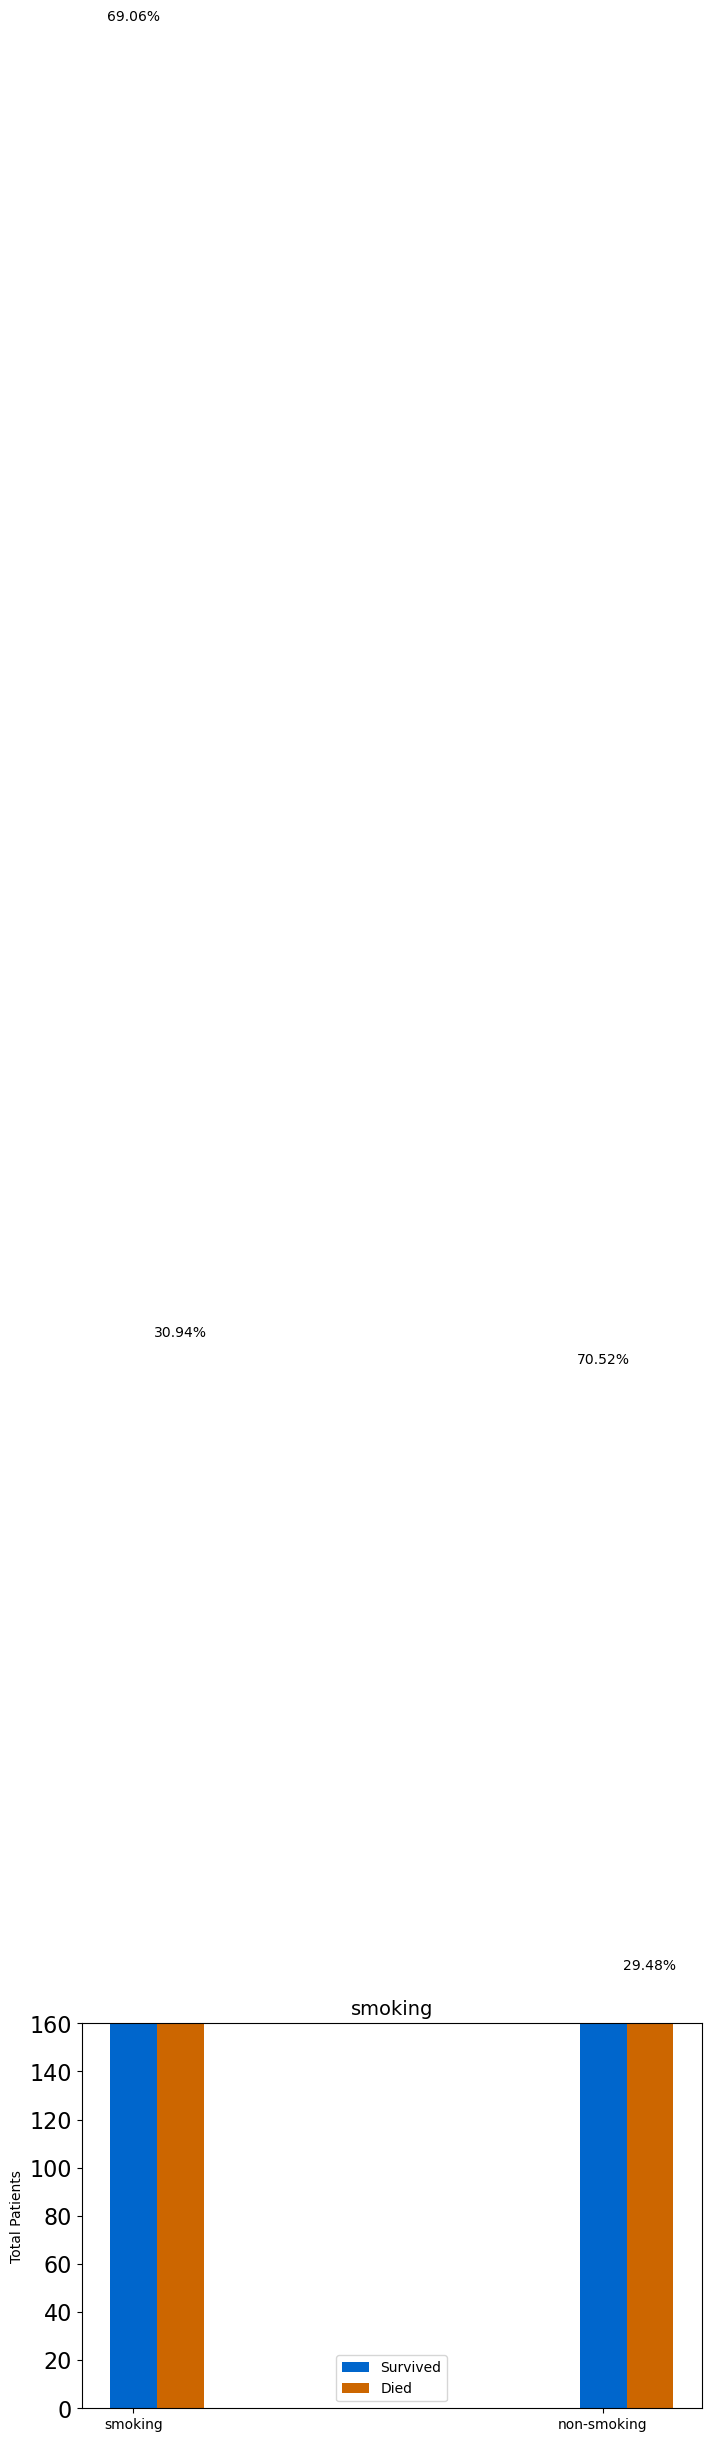

In [13]:
cat= ['high_blood_pressure','anaemia','diabetes','smoking']
types=[['normal BP','High BP'],['no anaemia','anaemia'],['no diabetes','diabetes'], ['smoking', 'non-smoking']]

for i,c in enumerate(cat):
    alive = heartData[heartData['DEATH_EVENT']==0]
    died= heartData[heartData['DEATH_EVENT']==1]
    plt.figure(figsize=(8,5))
    bar1=plt.bar([0,1], alive.groupby(c).count()['age'], width=0.1, color='#0066cc', align='center', label="Survived")
    bar2= plt.bar([0+0.1,1+0.1], died.groupby(c).count()['age'], width=0.1, color='#cc6600', align='center', label="Died")
    plt.title(c,{'fontsize': 14})
    plt.ylabel('Total Patients') 
    plt.ylim(0,160)
    plt.xticks([0,1], types[i])
    
    plt.yticks(fontsize=16)
    plt.legend()
    
    hights_odd=[]
    hights_even=[]
    
    for i,rect in enumerate (bar1 + bar2):
        height = rect.get_height()
        if (i+1)%2==0:
            hights_even.append(height)
        if (i+1)%2!=0:
            hights_odd.append(height)

    for i,rect in enumerate (bar1 + bar2):
        height = rect.get_height()
        if (i+1)%2==0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(round((height/sum(hights_even)*100),2))+"%", ha='center', va='bottom')
        if (i+1)%2!=0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(round((height/sum(hights_odd))*100,2))+"%", ha='center', va='bottom')
     

In [14]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train_norm, y_train)
    dt_scores.append(dt_classifier.score(X_test_norm, y_test))

In [15]:
#Determine Precision, Recall, F1, and accuracy of the decision tree algorithm
dtree2 = tree.DecisionTreeClassifier()
dt_parm = dtree2.fit(X_train_norm, y_train)
dt_scores.append(dtree2.score(X_train_norm, y_train))
y_dtree=dtree2.predict(X_test_norm)

print("Decision Tree Training Data Accuracy = {0:.2f}".format(100*dt_parm.score(X_train_norm, y_train)))
print("Decision Tree Test Data Accuracy  = {0:.2f}".format(100*metrics.accuracy_score(y_test, y_dtree)))
print(classification_report(y_test, y_dtree))

Decision Tree Training Data Accuracy = 99.94
Decision Tree Test Data Accuracy  = 96.10
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       279
           1       0.98      0.90      0.94       131

    accuracy                           0.96       410
   macro avg       0.97      0.95      0.95       410
weighted avg       0.96      0.96      0.96       410



In [16]:
RFC=RandomForestClassifier(max_features='sqrt', max_depth=1000, random_state=1, n_estimators=1000, min_samples_split=2)
RFC_clf = RFC.fit(X_train_norm, y_train)
y_RFC=RFC.predict(X_test_norm)

In [17]:
#predict accuracy of data
print('Random Forest Classifier Train Accuracy: ', "{0:.2f}%".format(100*(RFC_clf.score(X_train_norm, y_train))))
print('Random Forest Classifier Test Accuracy: ', "{0:.2f}%".format(100*(metrics.accuracy_score(y_test, y_RFC))))
print(classification_report(y_test,y_RFC))

Random Forest Classifier Train Accuracy:  99.94%
Random Forest Classifier Test Accuracy:  96.83%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       279
           1       0.97      0.93      0.95       131

    accuracy                           0.97       410
   macro avg       0.97      0.96      0.96       410
weighted avg       0.97      0.97      0.97       410



In [18]:
#Hypertuned
estimator = RandomForestClassifier()
param_grid = {
    'max_depth':range(2,7),
    'n_estimators':range(10,30)
}

In [19]:
grid_search_rf = GridSearchCV(estimator,param_grid=param_grid)
grid_search_rf.fit(X_train_norm, y_train)

print('Best Parameters were: {}'.format(grid_search_rf.best_params_))
print('Best CrossVal Score was:', "{0:.2f}%".format(100*(grid_search_rf.best_score_)))

Best Parameters were: {'max_depth': 6, 'n_estimators': 10}
Best CrossVal Score was: 94.51%


In [20]:
rf_clf = RandomForestClassifier(
    max_depth = 5,
    n_estimators = 19
)
rf_clf.fit(
    X_train_norm,
    y_train.values.ravel()
)

RandomForestClassifier(max_depth=5, n_estimators=19)

In [21]:
y_pred_rf = rf_clf.predict(X_test_norm)

print(classification_report(y_test,y_pred_rf))
print('Random Forest Classifier Hypertuned Train Accuracy: ', "{0:.2f}%".format(100*(grid_search_rf.score(X_train_norm, y_train))))
print('Random Forest Classifier Hypertuned Test Accuracy: ', "{0:.2f}%".format(100*(metrics.accuracy_score(y_test, y_pred_rf))))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       279
           1       0.93      0.83      0.88       131

    accuracy                           0.93       410
   macro avg       0.93      0.90      0.91       410
weighted avg       0.93      0.93      0.93       410

Random Forest Classifier Hypertuned Train Accuracy:  95.12%
Random Forest Classifier Hypertuned Test Accuracy:  92.68%


In [22]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

In [23]:
SVC_param={'kernel':['linear','rbf','poly','sigmoid'],
           'C':[0.1,1,10],
           'decision_function_shape':['ovr'],
           'random_state':[0]}
SVC_pol=SVC()
SVC_parm=GridSearchCV(SVC_pol, SVC_param, cv=5)
SVC_parm.fit(X_train_norm, y_train)
y_pol=SVC_parm.predict(X_test_norm)

In [24]:
modelSVC = svm.SVC(kernel='linear') # Linear Kernel

modelSVC.fit(X_train_norm, y_train)

y_pred_svc = modelSVC.predict(X_test_norm)

#Accuracy Scores for Test & Training Data
print("Linear SVC Train Accuracy =  {:.2f}%".format(modelSVC.score(X_train_norm,y_train)*100))
print("Linear SVC Test Accuracy  = {:.2f}%".format(modelSVC.score(X_test_norm,y_test)*100))
print(classification_report(y_test,y_pred_svc))

Linear SVC Train Accuracy =  86.64%
Linear SVC Test Accuracy  = 85.37%
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       279
           1       0.78      0.76      0.77       131

    accuracy                           0.85       410
   macro avg       0.83      0.83      0.83       410
weighted avg       0.85      0.85      0.85       410



In [25]:
param_grid = {'C':[1,2,3,4,5,6,7,8,14], 'gamma':[0.1, 0.01, 0.001, 0.0001], 'kernel':['linear', 'poly', 'rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(), scoring='f1', refit= True, verbose=1)

In [26]:
grid.fit(X_train_norm, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 14],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='f1', verbose=1)

In [27]:
grid.best_params_

{'C': 14, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
y_pred_svcgs = grid.predict(X_test_norm)

print("Linear SVC Train Accuracy =  {:.2f}%".format(100*grid.score(X_train_norm,y_train)))
print("Linear SVC Test Accuracy  = {:.2f}%".format(100*modelSVC.score(X_test_norm,y_test)))
print(classification_report(y_test, y_pred_svcgs))

Linear SVC Train Accuracy =  98.47%
Linear SVC Test Accuracy  = 85.37%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       279
           1       0.92      0.91      0.92       131

    accuracy                           0.95       410
   macro avg       0.94      0.94      0.94       410
weighted avg       0.95      0.95      0.95       410



In [29]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier = classifier.fit(X_train_norm,y_train)

y_pred = classifier.predict(X_test_norm)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(classifier.score)
print('Training Data Accuracy for K Nearest Neighbor: {:.2f}%'.format(100*accuracy))
print(classification_report(y_test,y_pred))

<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=3)>
Training Data Accuracy for K Nearest Neighbor: 93.17%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       279
           1       0.94      0.84      0.89       131

    accuracy                           0.93       410
   macro avg       0.93      0.91      0.92       410
weighted avg       0.93      0.93      0.93       410



In [30]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)
 
cv_scores = cross_val_score(knn_cv, X_train_norm, y_train, cv=5)

print(cv_scores)
print('Cross Validation Scores Accuracy :{:.2f}%'.format(100*np.mean(cv_scores)))

[0.92682927 0.88719512 0.89329268 0.90243902 0.9235474 ]
Cross Validation Scores Accuracy :90.67%


In [31]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train_norm, y_train)

y_pred_gscv = classifier.predict(X_test_norm)
print("Optimal number of K neighbors: ", knn_gscv.best_params_)
print("Accuracy of optimal number of K neighbors on training data:  {:.2f}%".format(100*knn_gscv.best_score_))

Optimal number of K neighbors:  {'n_neighbors': 1}
Accuracy of optimal number of K neighbors on training data:  93.11%


In [32]:
knn2.fit(X_train_norm, y_train)
y_knn2=knn2.predict(X_test_norm)

#Plot Confusion Matrix
cmK_NN = confusion_matrix(y_test, y_knn2)
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmK_NN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmK_NN.flatten()/np.sum(cmK_NN)]

print(classification_report(y_test,y_pred_gscv))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       279
           1       0.94      0.84      0.89       131

    accuracy                           0.93       410
   macro avg       0.93      0.91      0.92       410
weighted avg       0.93      0.93      0.93       410



In [33]:
#Reload Clean Dataset Variables for use in Rankings
x = heartData.copy() #create x,y variables to copy then randomly split 80/20 the dataset into training & test components 
y = x['DEATH_EVENT']
x = x.drop(['DEATH_EVENT'], axis=1)

In [34]:
Score1=[]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1000)

for a in range(100):
    forest = RandomForestClassifier(random_state=a)
    forest.fit(x_train,y_train)
    pred = forest.predict(x_test)
    b = accuracy_score(y_test,pred)
    Score1.append(b)

In [35]:
dtree = DecisionTreeClassifier(random_state=Score1.index(np.array(Score1).max()))
knn = KNeighborsClassifier()
forest = RandomForestClassifier(random_state=Score1.index(np.array(Score1).max()))
svmLR = SVC(random_state=Score1.index(np.array(Score1).max()))
svmLR.fit(x_train, y_train)

SVC(random_state=36)

In [36]:
knn.fit(x_train,y_train)
dtree.fit(x_train,y_train)
forest.fit(x_train,y_train)
svmLR.score(x_train,y_train)

0.6979166666666666

In [37]:
prediction1 = forest.predict(x_test)
print('                    Random Forest Classifier')
print(classification_report(y_test,prediction1))

                    Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       352
           1       0.99      0.95      0.97       161

    accuracy                           0.98       513
   macro avg       0.98      0.97      0.98       513
weighted avg       0.98      0.98      0.98       513



In [38]:
prediction2 = knn.predict(x_test)
print('                    K Nearest Neighbor Classifier')
print(classification_report(y_test,prediction2))

                    K Nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       352
           1       0.75      0.65      0.70       161

    accuracy                           0.82       513
   macro avg       0.80      0.78      0.79       513
weighted avg       0.82      0.82      0.82       513



In [39]:
prediction3 = dtree.predict(x_test)
print('                    Decision Tree Classifier')
print(classification_report(y_test,prediction3))

                    Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       352
           1       0.94      0.91      0.92       161

    accuracy                           0.95       513
   macro avg       0.95      0.94      0.95       513
weighted avg       0.95      0.95      0.95       513



In [40]:
prediction4 = svmLR.predict(x_test)
print('                    Linear SVC')
print(classification_report(y_test,prediction4))

                    Linear SVC
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       352
           1       0.00      0.00      0.00       161

    accuracy                           0.69       513
   macro avg       0.34      0.50      0.41       513
weighted avg       0.47      0.69      0.56       513



C:\Users\tooba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tooba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tooba\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
models = pd.Series(['Random Forest Classifier','Decision Tree Classifier','LinearSVC','K Nearest Neighbor'])
Accuracy = pd.Series([accuracy_score(y_test,prediction1),accuracy_score(y_test,prediction3),accuracy_score(y_test,prediction4),accuracy_score(y_test,prediction2)])
Leaderboard = pd.DataFrame({'Models':models,'Accuracy':Accuracy})
Leaderboard.index=['Gold','Silver','Bronze','Consolation Prize']
Leaderboard

,Models,Accuracy
Gold,Random Forest Classifier,0.980507
Silver,Decision Tree Classifier,0.953216
Bronze,LinearSVC,0.686160
Consolation Prize,K Nearest Neighbor,0.822612
